# Data Analysis

## Configuration

Disable cell scrolling.

Parameters are stored in a shared script.

In [1]:
from parameters import *

In [2]:
print('---------------------------------------')
print('Data directory:', DATA_DIR)
print('Datasets JSON file:', DATASETS_JSON)
print('---------------------------------------')

---------------------------------------
Data directory: data
Datasets JSON file: data/datasets.json
---------------------------------------


## Library

In [3]:
import json
import numpy as np
import pandas as pd

## Datasets

In [4]:
with open(DATASETS_JSON, 'r') as file:
    datasets_json = json.load(file)

for k in datasets_json.keys():
    print('Directory: ', k)
    !ls $DATA_DIR/$k
    print('---------')

Directory:  mc_data
IV_data_rvt.csv  params_rvt_200k
---------
Directory:  mc_data/.ipynb_checkpoints
params_rvt_200k-checkpoint
---------


### Load

In [5]:
'''
Training Data Information:

- IVData contains IV simulated curves using various parameter values, sampled by MC in Cadence
- Simulation uses the room temperature PDK for an EGLVT nFET
- Parameter values are sampled across a range set by what was used in Mystic to get Cryo models
- The specific parameters used in each simulated IV curve are stored in corresponding order in "paramVals"

'''
if MYSTIC_MC:
    iv_file = ['data/mc_data/writeData.csv']
    paramVals = "data/mc_data/parameters"
    
else:
    #iv_file = ['data/mc_data/IVData.csv']
    #paramVals = "data/mc_data/paramVals"
    iv_file = ['data/mc_data/IV_data_rvt.csv']
    paramVals = "data/mc_data/params_rvt_200k"
    

# Grab data from all files, incase there are many for future datasets with a different format
iv_list = []
for f in iv_file:
    iv_list.append(pd.read_csv(f))

# Grab all of the Parameter value information, for our y data later
with open(paramVals, "r") as file:
    paramVal_list = [line.strip() for line in file]


In [6]:
print(iv_list[0])

       Vg   /N0/d mcparamset 1  (A)  /N0/d mcparamset 2  (A)  \
0    0.100             1.000000e-14             1.000000e-14   
1    0.103             1.000000e-14             1.000000e-14   
2    0.106             1.000000e-14             1.000000e-14   
3    0.109             1.000000e-14             1.000000e-14   
4    0.112             1.000000e-14             1.000000e-14   
..     ...                      ...                      ...   
296  0.988             7.100000e-06             1.234000e-05   
297  0.991             7.119000e-06             1.242000e-05   
298  0.994             7.138000e-06             1.249000e-05   
299  0.997             7.155000e-06             1.257000e-05   
300  1.000             7.173000e-06             1.265000e-05   

     /N0/d mcparamset 3  (A)  /N0/d mcparamset 4  (A)  \
0               1.000000e-14             1.000000e-14   
1               1.000000e-14             1.000000e-14   
2               1.000000e-14             1.000000e-14   
3  

### Parse

In [7]:
# Define all of your parameter value lists for each mc iteration
# Right now there are 100000 training data sets, so lets make a spot to put each corresponding param value

phig1Sweep = [0] * 200000
citSweep = [0] * 200000
rdwSweep = [0] * 200000
rswSweep = [0] * 200000
u0Sweep = [0] * 200000
ucsSweep = [0] * 200000
uaSweep = [0] * 200000
euSweep = [0] * 200000
prwgSweep = [0] * 200000
udSweep = [0] * 200000

In [8]:
if MYSTIC_MC:
    i=0
    for line in paramVal_list:
        #u0Sweep[i] = float(line.split('u0_nom\': ')[-1].split(',')[0].replace('}',""))
        #citSweep[i] = float(line.split('cit_nom\': ')[-1].split(',')[0].replace('}',""))
        phig1Sweep[i] = float(line.split('phig1_nom\': ')[-1].split(',')[0].replace('}',""))
        rdwSweep[i] = float(line.split('rdw_nom\': ')[-1].split(',')[0].replace('}',""))
        rswSweep[i] = float(line.split('rsw_nom\': ')[-1].split(',')[0].replace('}',""))
        ucsSweep[i] = float(line.split('ucs_nom\': ')[-1].split(',')[0].replace('}',""))
        euSweep[i] = float(line.split('eu_nom\': ')[-1].split(',')[0].replace('}',""))
        uaSweep[i] = float(line.split('ua_nom\': ')[-1].split(',')[0].replace('}',""))
        prwgSweep[i] = float(line.split('prwg_nom\': ')[-1].split(',')[0].replace('}',""))
        udSweep[i] = float(line.split('ud_nom\': ')[-1].split(',')[0].replace('}',""))

        i+=1
else:
   
    for line in paramVal_list:
        
        # Iterate until the line containing "Sweep" is found, which is where the sweep number is specified
        if 'Sweep' in line or "_nom" in line:
            split_line = [item for item in line.split() if item]
            
            # Convert the last item to a float (assuming it's a scientific notation number)
            
            split_line[-1] = float(split_line[-1])
            split_line[-2] = float(split_line[-2])
            
            # Use parameter value to replace '0' in the corresponding List index from previous block
            if 'phig1' in line:
                phig1Sweep[int(split_line[-2]-1)] = split_line[-1]
            if 'cit' in line:
                citSweep[int(split_line[-2]-1)] = split_line[-1]
            if 'rdw' in line:
                rdwSweep[int(split_line[-2]-1)] = split_line[-1]
            if 'rsw' in line:
                rswSweep[int(split_line[-2]-1)] = split_line[-1]
            if 'u0' in line:
                u0Sweep[int(split_line[-2]-1)] = split_line[-1]
            if 'ucs' in line:
                ucsSweep[int(split_line[-2]-1)] = split_line[-1]
            if 'ua' in line:
                uaSweep[int(split_line[-2]-1)] = split_line[-1]
            if 'eu' in line:
                euSweep[int(split_line[-2]-1)] = split_line[-1]
            if 'prwg' in line:
                prwgSweep[int(split_line[-2]-1)] = split_line[-1]
            if 'ud' in line:
                udSweep[int(split_line[-2]-1)] = split_line[-1]

In [9]:
print(iv_list[0].iloc[:, 2])

0      1.000000e-14
1      1.000000e-14
2      1.000000e-14
3      1.000000e-14
4      1.000000e-14
           ...     
296    1.234000e-05
297    1.242000e-05
298    1.249000e-05
299    1.257000e-05
300    1.265000e-05
Name: /N0/d mcparamset 2  (A), Length: 301, dtype: float64


In [10]:
''' 
The IV curves are stored with Vg in the first file column, 
and Id data for each param set in following columns. Id columns
have column names like '/N0/d mcparamset 3 (A)' where the param set 
number is the same as the "Sweep" number in the ParamVals file.
'''

# Redefine iv_list to contain the info for all data, Param vals and IV curves
MockFile=[]
vd_value = float(0.01)
if MYSTIC_MC:
    vg = 'vgate'
else:
    vg = 'Vg '
for num in range(1,iv_list[0].columns.shape[0]):
    newMockFile = pd.DataFrame()
       
    # Create a new column "new_col" and insert it at position 1 (index 1)
    newMockFile.insert(len(newMockFile.columns), "Vg", iv_list[0][vg])  # Inserting column
    
    # Create a new column "Id" and insert it at the end (index len(newMockFile.columns))
    newMockFile.insert(len(newMockFile.columns), "Id", iv_list[0].iloc[:, num])

    newMockFile.insert(len(newMockFile.columns), "Vd", [vd_value] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "phig1", [phig1Sweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "u0", [u0Sweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "rdw", [rdwSweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "rsw", [rswSweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "ud", [udSweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "ucs", [ucsSweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "ua", [uaSweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "prwg", [prwgSweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "eu", [euSweep[num-1]] * len(iv_list[0]))
    newMockFile.insert(len(newMockFile.columns), "cit", [citSweep[num-1]] * len(iv_list[0]))
    
    MockFile.append(newMockFile)

iv_list = MockFile

### Concatenate

In [11]:
print(iv_list[0])

        Vg            Id    Vd   phig1     u0     rdw     rsw      ud     ucs  \
0    0.100  1.000000e-14  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
1    0.103  1.000000e-14  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
2    0.106  1.000000e-14  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
3    0.109  1.000000e-14  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
4    0.112  1.000000e-14  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
..     ...           ...   ...     ...    ...     ...     ...     ...     ...   
296  0.988  7.100000e-06  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
297  0.991  7.119000e-06  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
298  0.994  7.138000e-06  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
299  0.997  7.155000e-06  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   
300  1.000  7.173000e-06  0.01  1.0115  1.372  2.3292  1.5449  1.6704  3.3989   

          ua     prwg      

In [12]:
df_iv= pd.concat(iv_list)

# Set values below measurement noise floor to global_min, So we prepare the model for the input measurement data
if MYSTIC_MC:
    noiseFloor = -1e-10 #rvtnfets
    
    # find minimum value for data we want to measure and set that to minimum so it doesnt learn any misleading information
    filename = 'test_measurements/rvtnMeasurementData.csv'
    df = pd.read_csv(filename)
    dataId = df.iloc[:, 1].to_numpy()
    dataVg = df.iloc[:, 0].to_numpy() 
    
    dataId = np.where(dataId < noiseFloor, 0, dataId)
    valid_values = dataId[dataId != 0]
    global_min = np.min(valid_values)
    
    print(global_min)
    
    df_iv["Id"] = df_iv["Id"].mask(df_iv["Id"] > noiseFloor, global_min) 
else:
    noiseFloor = 1e-10 #eglvtnfets, and rvtnfets mystic flips sign

    # find minimum value for data we want to measure and set that to minimum so it doesnt learn any misleading information
    filename = 'test_measurements/rvtnMeasurementData.csv'
    df = pd.read_csv(filename)
    dataId = df.iloc[:, 1].to_numpy()
    dataVg = df.iloc[:, 0].to_numpy() 
    
    dataId = np.where(dataId < noiseFloor, 0, dataId)
    valid_values = dataId[dataId != 0]
    global_min = np.min(valid_values)
    
    print(global_min)

    df_iv["Id"] = df_iv["Id"].mask(df_iv["Id"] < noiseFloor, global_min) 

1.77e-10


In [13]:
display(df_iv)

Vg            Id    Vd   phig1      u0     rdw      rsw      ud  \
0    0.100  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
1    0.103  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
2    0.106  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
3    0.109  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
4    0.112  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
..     ...           ...   ...     ...     ...     ...      ...     ...   
296  0.988  1.047000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
297  0.991  1.050000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
298  0.994  1.054000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
299  0.997  1.058000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
300  1.000  1.062000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   

         ucs       ua     prwg      eu     cit  
0    3.39890  0.94821  0.40877  1.8728  21.131  
1    3.39890  0.94821  0.40877  1.8728  21.131  
2    3.39890  0.94821  0.40877  1.8728  21.131  
3    3.39890  0.94821  0.40877  1.8728  21.131  
4    3.39890  0.94821  0.40877  1.8728  21.131  
..       ...      ...      ...     ...     ...  
296  0.83929  0.92136  0.11979  1.1388  25.046  
297  0.83929  0.92136  0.11979  1.1388  25.046  
298  0.83929  0.92136  0.11979  1.1388  25.046  
299  0.83929  0.92136  0.11979  1.1388  25.046  
300  0.83929  0.92136  0.11979  1.1388  25.046  

[60200000 rows x 13 columns]

### Log Scale a Copy

In [14]:
df_iv_log = df_iv.copy()

# Apply ln scaling to the "Id" column in the copied DataFrame 
df_iv_log['Id'] = np.log(np.abs(df_iv_log['Id']))

### Validate and View Data

In [15]:
# Print this location in modified frame so you can check log scaling worked, only Id should have changed
if MYSTIC_MC:
    last = 300
else:
    last = 300
print(df_iv_log.iloc[last*2 + 1])  

Vg        1.000000
Id      -11.277853
Vd        0.010000
phig1     1.026500
u0        2.947000
rdw       3.454200
rsw       2.669900
ud        1.970400
ucs       1.848900
ua        0.648210
prwg      0.258770
eu        0.747780
cit      28.381000
Name: 300, dtype: float64


In [16]:
# Check that everything looks good--
# Only Vg values should change for every iloc 0-301
# The last Id value in the third IV dataset, so iloc(300*2 + 1) should be 672.0E-9 for egnfet cadence_mc data
print(df_iv.iloc[last*2 + 1]) 

Vg        1.000000
Id        0.000013
Vd        0.010000
phig1     1.026500
u0        2.947000
rdw       3.454200
rsw       2.669900
ud        1.970400
ucs       1.848900
ua        0.648210
prwg      0.258770
eu        0.747780
cit      28.381000
Name: 300, dtype: float64


In [17]:
display(df_iv)

Vg            Id    Vd   phig1      u0     rdw      rsw      ud  \
0    0.100  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
1    0.103  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
2    0.106  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
3    0.109  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
4    0.112  1.770000e-10  0.01  1.0115  1.3720  2.3292  1.54490  1.6704   
..     ...           ...   ...     ...     ...     ...      ...     ...   
296  0.988  1.047000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
297  0.991  1.050000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
298  0.994  1.054000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
299  0.997  1.058000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   
300  1.000  1.062000e-05  0.01  1.0050  1.9981  4.0570  0.65739  1.1070   

         ucs       ua     prwg      eu     cit  
0    3.39890  0.94821  0.40877  1.8728  21.131  
1    3.39890  0.94821  0.40877  1.8728  21.131  
2    3.39890  0.94821  0.40877  1.8728  21.131  
3    3.39890  0.94821  0.40877  1.8728  21.131  
4    3.39890  0.94821  0.40877  1.8728  21.131  
..       ...      ...      ...     ...     ...  
296  0.83929  0.92136  0.11979  1.1388  25.046  
297  0.83929  0.92136  0.11979  1.1388  25.046  
298  0.83929  0.92136  0.11979  1.1388  25.046  
299  0.83929  0.92136  0.11979  1.1388  25.046  
300  0.83929  0.92136  0.11979  1.1388  25.046  

[60200000 rows x 13 columns]

In [18]:
display(df_iv_log)

Vg         Id    Vd   phig1      u0     rdw      rsw      ud      ucs  \
0    0.100 -22.454871  0.01  1.0115  1.3720  2.3292  1.54490  1.6704  3.39890   
1    0.103 -22.454871  0.01  1.0115  1.3720  2.3292  1.54490  1.6704  3.39890   
2    0.106 -22.454871  0.01  1.0115  1.3720  2.3292  1.54490  1.6704  3.39890   
3    0.109 -22.454871  0.01  1.0115  1.3720  2.3292  1.54490  1.6704  3.39890   
4    0.112 -22.454871  0.01  1.0115  1.3720  2.3292  1.54490  1.6704  3.39890   
..     ...        ...   ...     ...     ...     ...      ...     ...      ...   
296  0.988 -11.466997  0.01  1.0050  1.9981  4.0570  0.65739  1.1070  0.83929   
297  0.991 -11.464135  0.01  1.0050  1.9981  4.0570  0.65739  1.1070  0.83929   
298  0.994 -11.460333  0.01  1.0050  1.9981  4.0570  0.65739  1.1070  0.83929   
299  0.997 -11.456545  0.01  1.0050  1.9981  4.0570  0.65739  1.1070  0.83929   
300  1.000 -11.452772  0.01  1.0050  1.9981  4.0570  0.65739  1.1070  0.83929   

          ua     prwg      eu     cit  
0    0.94821  0.40877  1.8728  21.131  
1    0.94821  0.40877  1.8728  21.131  
2    0.94821  0.40877  1.8728  21.131  
3    0.94821  0.40877  1.8728  21.131  
4    0.94821  0.40877  1.8728  21.131  
..       ...      ...     ...     ...  
296  0.92136  0.11979  1.1388  25.046  
297  0.92136  0.11979  1.1388  25.046  
298  0.92136  0.11979  1.1388  25.046  
299  0.92136  0.11979  1.1388  25.046  
300  0.92136  0.11979  1.1388  25.046  

[60200000 rows x 13 columns]

## Group and Organize

The input variables (or features) of our regression model(s) are:
- **VG** (gate voltage) (we remove later because it is fixed for all data)
- **VD** (drain voltage) (we remove later because it is fixed for all data)
- **ID** (drain current)

The output variable (or target) of our regression model(s) are:
- **phig1** (work function)
- **u0** (mobility)
- **rdw** (drain resistance)
- **rsw** (gate resistance)
- **ua** (couloumb scattering)
- **ucs** (mobility coefficient)
- **prwg** (gate resistance)
- **eu** (mobility coefficient)
- **cit** (interface traps)
- **ud** (mobility coefficient)

Here we will match the y data with the corresponding x data

We will also put the datasets into lists rather than individual points, so we can train on a whole IV curve

In [23]:
# Print all of the points in this dataset where 'phig1' is 4.6097, etc. This block is strictly for validating the next block

# Compare the values in "Id" after grouping in the following block to make sure everything has stayed correct after processing
if MYSTIC_MC:
    # Filter rows where each parameter value is equal to the first parameter set in the next block
    filtered_rows = df_iv[df_iv['phig1'] == 4.6097]
    filtered_rows = filtered_rows[filtered_rows['u0'] == 0.057881]
    filtered_rows = filtered_rows[filtered_rows['eu'] == 2.3395]
    filtered_rows = filtered_rows[filtered_rows['ucs'] == 3.0194]
    filtered_rows = filtered_rows[filtered_rows['ua'] == 19.084]
    filtered_rows = filtered_rows[filtered_rows['ud'] == 0.96752]
    filtered_rows = filtered_rows[filtered_rows['prwg'] == -0.26357]
    filtered_rows = filtered_rows[filtered_rows['cit'] == 0.016055]
    filtered_rows = filtered_rows[filtered_rows['rdw'] == 158.15]
    filtered_rows = filtered_rows[filtered_rows['rsw'] == 154.96]
else:
    # Filter rows where each parameter value is equal to the first parameter set in the next block
    #eglvt data
    '''filtered_rows = df_iv[df_iv['phig1'] == 4.6097]
    filtered_rows = filtered_rows[filtered_rows['u0'] == 0.057881]
    filtered_rows = filtered_rows[filtered_rows['eu'] == 2.3395]
    filtered_rows = filtered_rows[filtered_rows['ucs'] == 3.0194]
    filtered_rows = filtered_rows[filtered_rows['ua'] == 19.084]
    filtered_rows = filtered_rows[filtered_rows['ud'] == 0.96752]
    filtered_rows = filtered_rows[filtered_rows['prwg'] == -0.26357]
    filtered_rows = filtered_rows[filtered_rows['cit'] == 0.016055]
    filtered_rows = filtered_rows[filtered_rows['rdw'] == 158.15]
    filtered_rows = filtered_rows[filtered_rows['rsw'] == 154.96]
    #rvt data round 1
    filtered_rows = df_iv[df_iv['phig1'] == 0.99]
    filtered_rows = filtered_rows[filtered_rows['u0'] == 0.95177]
    filtered_rows = filtered_rows[filtered_rows['eu'] == 1.9414]
    filtered_rows = filtered_rows[filtered_rows['ucs'] == 1.4705]
    filtered_rows = filtered_rows[filtered_rows['ua'] == 1.19540]
    filtered_rows = filtered_rows[filtered_rows['ud'] == 1.68850]
    filtered_rows = filtered_rows[filtered_rows['prwg'] == 0.092137]
    filtered_rows = filtered_rows[filtered_rows['cit'] == 27.7160]
    filtered_rows = filtered_rows[filtered_rows['rdw'] == 3.7156]
    filtered_rows = filtered_rows[filtered_rows['rsw'] == 2.6636]'''
    #rvt data round 2
    filtered_rows = df_iv[df_iv['phig1'] == 0.99]
    filtered_rows = filtered_rows[filtered_rows['u0'] == 0.91632]
    filtered_rows = filtered_rows[filtered_rows['eu'] == 1.35930]
    filtered_rows = filtered_rows[filtered_rows['ucs'] ==2.3984]
    filtered_rows = filtered_rows[filtered_rows['ua'] == 0.35007]
    filtered_rows = filtered_rows[filtered_rows['ud'] == 1.25410]
    filtered_rows = filtered_rows[filtered_rows['prwg'] == 0.202120]
    filtered_rows = filtered_rows[filtered_rows['cit'] == 2.4323]
    filtered_rows = filtered_rows[filtered_rows['rdw'] == 3.36490]
    filtered_rows = filtered_rows[filtered_rows['rsw'] == 2.55800]								

# Display the filtered rows
print(filtered_rows)

        Vg            Id    Vd  phig1       u0     rdw    rsw      ud     ucs  \
0    0.100  1.770000e-10  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
1    0.103  1.770000e-10  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
2    0.106  1.770000e-10  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
3    0.109  1.770000e-10  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
4    0.112  1.770000e-10  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
..     ...           ...   ...    ...      ...     ...    ...     ...     ...   
296  0.988  6.514000e-06  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
297  0.991  6.537000e-06  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
298  0.994  6.560000e-06  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
299  0.997  6.582000e-06  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   
300  1.000  6.605000e-06  0.01   0.99  0.91632  3.3649  2.558  1.2541  2.3984   

          ua     prwg      

In [20]:
# Group all of the data points associated with each set of parameter values, so you have lists for each dataset
X_iv = df_iv.groupby(['phig1','u0', 'eu','ucs','ua','ud','prwg','cit','rdw','rsw'])[['Vg', 'Vd', 'Id']].agg(lambda x: x.tolist())
X_iv_log = df_iv_log.groupby(['phig1','u0', 'eu','ucs','ua','ud','prwg','cit','rdw','rsw'])[['Vg', 'Vd', 'Id']].agg(lambda x: x.tolist())

# Check that this worked properly (can compare first row of "Id" values with previous printed values to ensure correctness)
display(X_iv)

Vg  \
phig1 u0      eu      ucs    ua      ud      prwg      cit     rdw     rsw                                                          
0.99  0.91632 1.35930 2.3984 0.35007 1.25410  0.202120 2.4323  3.36490 2.55800  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      1.04490 1.71270 2.6200 1.12930 1.03210  0.128860 5.4104  4.36840 3.80080  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      1.05890 0.67547 6.8761 0.75174 1.12600 -0.068012 10.1980 4.12100 0.70693  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      1.21110 1.79730 1.6998 1.15850 1.73680  0.353180 23.6620 3.71920 2.80750  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      1.35360 0.98751 2.6461 0.32327 1.83330  0.097110 16.1210 2.61190 4.60580  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
...                                                                                                                           ...   
1.05  2.86210 1.53300 5.9594 1.18510 0.99847  0.359490 9.8236  4.97750 1.90880  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      2.89810 1.84020 6.1647 0.19720 1.96580  0.115540 21.3680 3.55300 3.73330  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      2.90240 1.26590 2.3026 1.24410 1.17850  0.096795 26.7500 1.12230 0.91981  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      2.90810 0.83817 6.5716 0.72126 0.97198  0.274920 17.0380 0.83031 4.01370  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
      2.91240 0.63919 4.2337 0.57082 1.38460 -0.043833 18.4530 3.81370 2.32690  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   

                                                                                                                               Vd  \
phig1 u0      eu      ucs    ua      ud      prwg      cit     rdw     rsw                                                          
0.99  0.91632 1.35930 2.3984 0.35007 1.25410  0.202120 2.4323  3.36490 2.55800  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      1.04490 1.71270 2.6200 1.12930 1.03210  0.128860 5.4104  4.36840 3.80080  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      1.05890 0.67547 6.8761 0.75174 1.12600 -0.068012 10.1980 4.12100 0.70693  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      1.21110 1.79730 1.6998 1.15850 1.73680  0.353180 23.6620 3.71920 2.80750  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      1.35360 0.98751 2.6461 0.32327 1.83330  0.097110 16.1210 2.61190 4.60580  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
...                                                                                                                           ...   
1.05  2.86210 1.53300 5.9594 1.18510 0.99847  0.359490 9.8236  4.97750 1.90880  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      2.89810 1.84020 6.1647 0.19720 1.96580  0.115540 21.3680 3.55300 3.73330  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      2.90240 1.26590 2.3026 1.24410 1.17850  0.096795 26.7500 1.12230 0.91981  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      2.90810 0.83817 6.5716 0.72126 0.97198  0.274920 17.0380 0.83031 4.01370  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
      2.91240 0.63919 4.2337 0.57082 1.38460 -0.043833 18.4530 3.81370 2.32690  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   

                                                                                                                               Id  
phig1 u0      eu      ucs    ua      ud      prwg      cit     rdw     rsw                                                         
0.99  0.91632 1.35930 2.3984 0.35007 1.25410  0.202120 2.4323  3.36490 2.55800  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
      1.04490 1.71270 2.6200 1.12930 1.03210  0.128860 5.4104  4.36840 3.80080  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
      1.05890 0.67547 6.8761 0.75174 1.12600 -0.068012 10.1980 4.12100 0.70693  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
      1

In [21]:
# Separate the parameter values into y dataframes
y_iv = pd.DataFrame(X_iv.index.tolist(), columns=['phig1','u0', 'eu','ucs','ua','ud','prwg','cit','rdw','rsw'])

# Get rid of the parameters as index labels, just keep the lists, for x training. 
# Keep Vg and Vd for now, so you can import them into the next script for plotting purposes (although we will discard them for training)

X_iv = X_iv.reset_index()
X_iv_log = X_iv_log.reset_index()
X_iv = X_iv[['Vg', 'Vd', 'Id']]
X_iv_log = X_iv_log[['Vg', 'Vd', 'Id']]

In [22]:
#Check that the first index has a list of Id values that matches the correct parameter values in the first index of y df
display(X_iv)
display(y_iv)

Vg  \
0       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
1       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
2       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
3       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
4       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
...                                                   ...   
199995  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199996  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199997  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199998  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199999  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   

                                                       Vd  \
0       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
1       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
2       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
3       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
4       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
...                                                   ...   
199995  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
199996  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
199997  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
199998  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
199999  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   

                                                       Id  
0       [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
1       [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
2       [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
3       [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
4       [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
...                                                   ...  
199995  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
199996  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
199997  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
199998  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  
199999  [1.77e-10, 1.77e-10, 1.77e-10, 1.77e-10, 1.77e...  

[200000 rows x 3 columns]

phig1       u0       eu     ucs       ua       ud      prwg      cit  \
0        0.99  0.91632  1.35930  2.3984  0.35007  1.25410  0.202120   2.4323   
1        0.99  1.04490  1.71270  2.6200  1.12930  1.03210  0.128860   5.4104   
2        0.99  1.05890  0.67547  6.8761  0.75174  1.12600 -0.068012  10.1980   
3        0.99  1.21110  1.79730  1.6998  1.15850  1.73680  0.353180  23.6620   
4        0.99  1.35360  0.98751  2.6461  0.32327  1.83330  0.097110  16.1210   
...       ...      ...      ...     ...      ...      ...       ...      ...   
199995   1.05  2.86210  1.53300  5.9594  1.18510  0.99847  0.359490   9.8236   
199996   1.05  2.89810  1.84020  6.1647  0.19720  1.96580  0.115540  21.3680   
199997   1.05  2.90240  1.26590  2.3026  1.24410  1.17850  0.096795  26.7500   
199998   1.05  2.90810  0.83817  6.5716  0.72126  0.97198  0.274920  17.0380   
199999   1.05  2.91240  0.63919  4.2337  0.57082  1.38460 -0.043833  18.4530   

            rdw      rsw  
0       3.36490  2.55800  
1       4.36840  3.80080  
2       4.12100  0.70693  
3       3.71920  2.80750  
4       2.61190  4.60580  
...         ...      ...  
199995  4.97750  1.90880  
199996  3.55300  3.73330  
199997  1.12230  0.91981  
199998  0.83031  4.01370  
199999  3.81370  2.32690  

[200000 rows x 10 columns]

### Visualize

100K curves takes a while, avoid running if you can or just plot a section of the data

In [24]:
%matplotlib ipympl
#%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

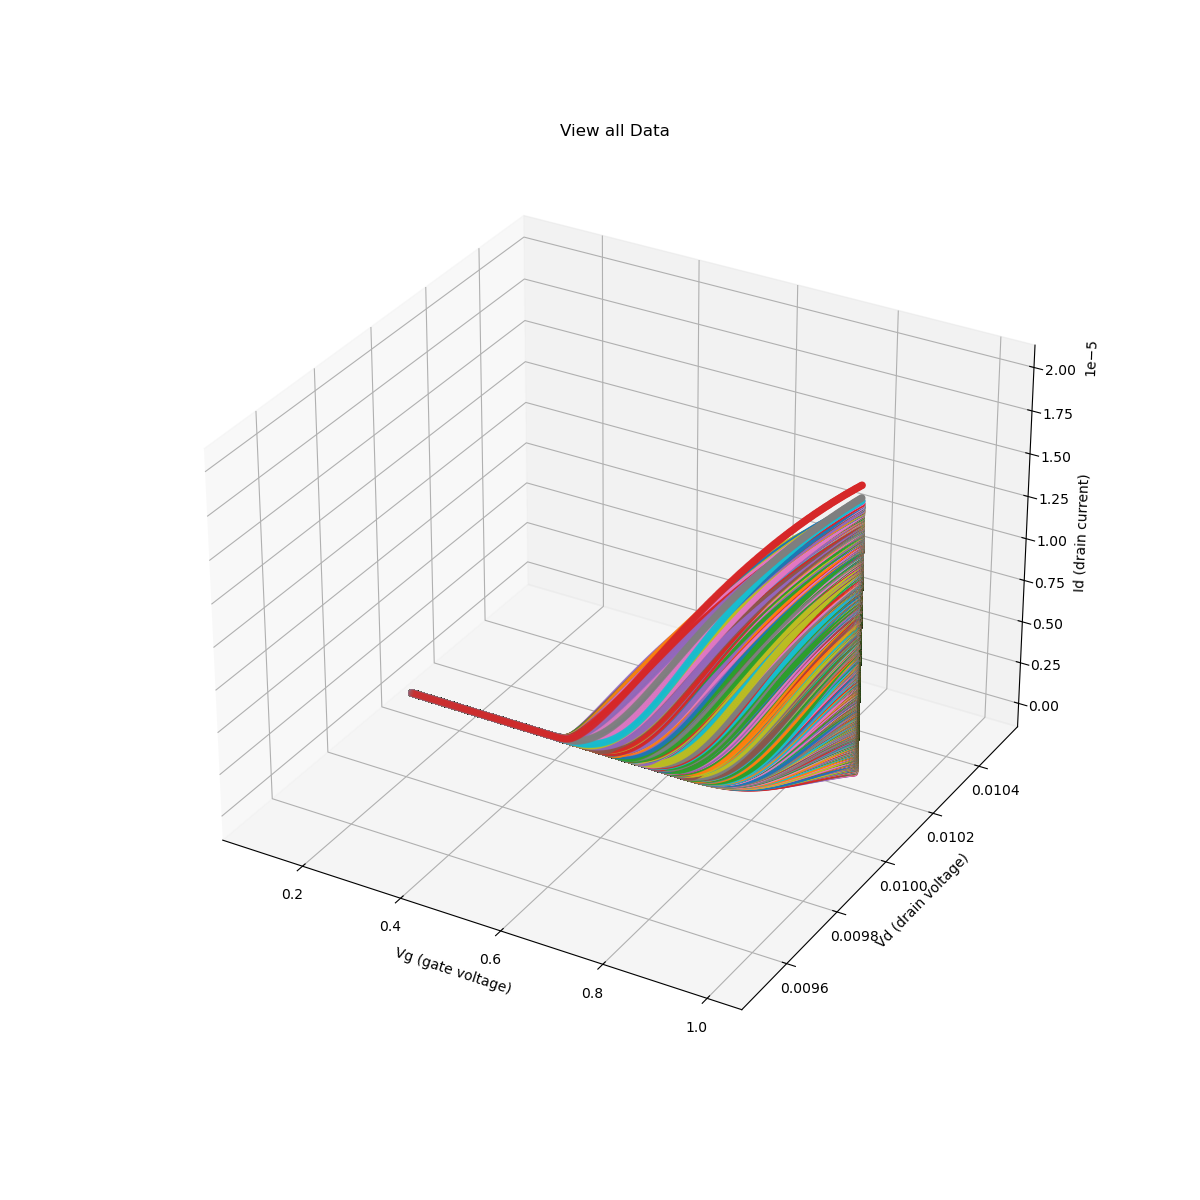

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i, row in X_iv.iterrows():
    Vg, Vd, Id = row
    ax.scatter(Vg, Vd, Id)
_ = ax.set_xlabel('Vg (gate voltage)')
_ = ax.set_ylabel('Vd (drain voltage)')
_ = ax.set_zlabel('Id (drain current)')
_ = ax.set_title('View all Data')
plt.show()

In [26]:
plt.savefig('plots/hundredThousandSamples.png')
plt.close()

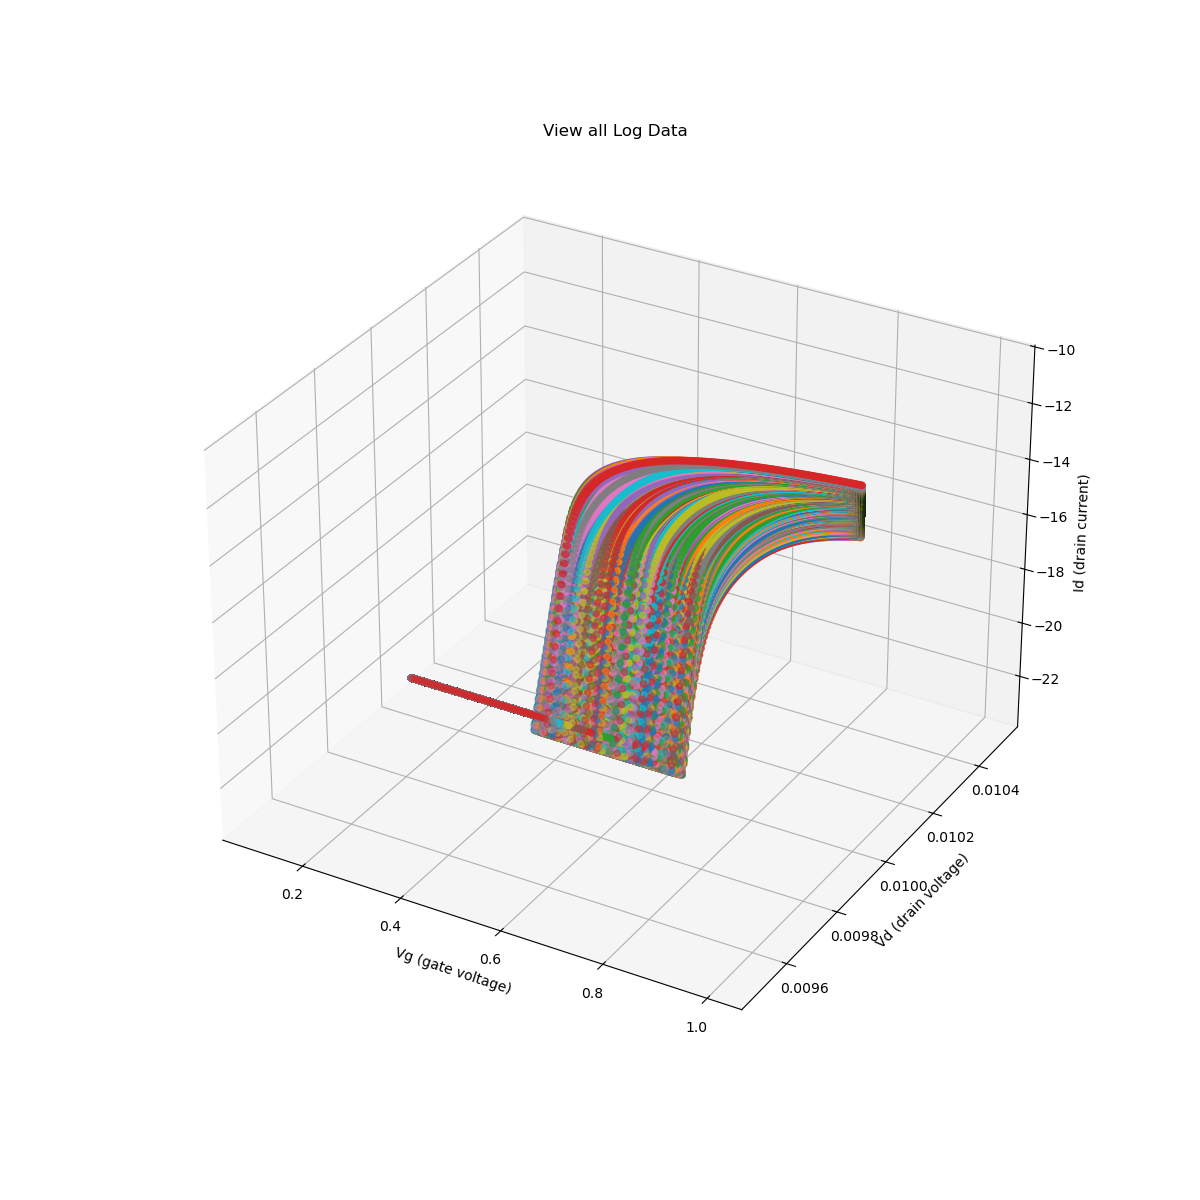

In [27]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i, row in X_iv_log.iterrows():
    Vg, Vd, Id = row
    ax.scatter(Vg, Vd, Id)
_ = ax.set_xlabel('Vg (gate voltage)')
_ = ax.set_ylabel('Vd (drain voltage)')
_ = ax.set_zlabel('Id (drain current)')
_ = ax.set_title('View all Log Data')
plt.show()

In [28]:
plt.savefig('plots/hundredThousandSamplesLog.png')
plt.close()

### Augment 

Scale Id between 0 and 1

In [29]:
import import_ipynb
import numpy as np
from ml_custom_scaler import Scaler

importing Jupyter notebook from ml_custom_scaler.ipynb


In [30]:
# Grab just the training column
X_drain_current = X_iv[['Id']]
X_drain_current_log = X_iv_log[['Id']]

In [31]:
scaler = Scaler()
# Scale both lin/log datasets
scaled_x, global_min_lin, global_max_lin = scaler.scale(X_drain_current)
scaled_x_log, global_min_log, global_max_log = scaler.scale(X_drain_current_log)

Found global min: 1e-10
Found global max: 1.983e-05
Found global min: -23.025850929940457
Found global max: -10.82831461543257


In [32]:
# Save these scaling factors so you can use them later for input measurement data
file_path = 'scaling_boundaries.txt'

# Write the values to the text file
with open(file_path, 'w') as file:
    file.write(f"min_lin: {global_min_lin}\n")
    file.write(f"max_lin: {global_max_lin}\n")
    file.write(f"min_log: {global_min_log}\n")
    file.write(f"max_log: {global_max_log}\n")

print(f"Variables have been saved to {file_path}")

Variables have been saved to scaling_boundaries.txt


In [33]:
# Check the scaling
display(scaled_x)

Scaled_Id
0       [3.883025128719762e-06, 3.883025128719762e-06,...
1       [3.883025128719762e-06, 3.883025128719762e-06,...
2       [3.883025128719762e-06, 3.883025128719762e-06,...
3       [3.883025128719762e-06, 3.883025128719762e-06,...
4       [3.883025128719762e-06, 3.883025128719762e-06,...
...                                                   ...
199995  [3.883025128719762e-06, 3.883025128719762e-06,...
199996  [3.883025128719762e-06, 3.883025128719762e-06,...
199997  [3.883025128719762e-06, 3.883025128719762e-06,...
199998  [3.883025128719762e-06, 3.883025128719762e-06,...
199999  [3.883025128719762e-06, 3.883025128719762e-06,...

[200000 rows x 1 columns]

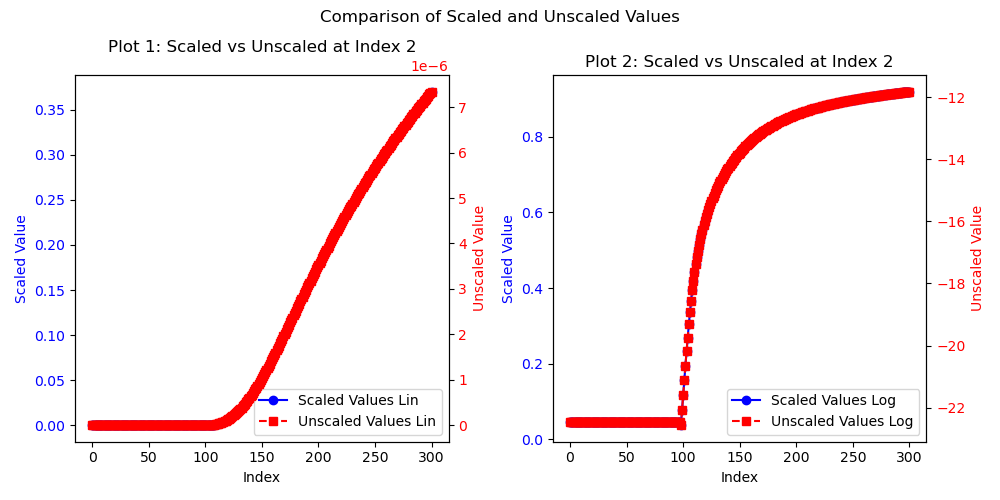

In [34]:
import matplotlib.pyplot as plt

# Plot the scaled vs unscaled list in index 2 (or some other random index) to validate the data ordering is still correct
# Assuming scaled_x and X_drain_current are pre-defined DataFrames
i = 2
sample_scaled_values_1 = scaled_x['Scaled_Id'].iloc[i]
sample_unscaled_values_1 = X_drain_current['Id'].iloc[i]

# Create a new set of sample data for the second plot
sample_scaled_values_2 = scaled_x_log['Scaled_Id'].iloc[i]
sample_unscaled_values_2 = X_drain_current_log['Id'].iloc[i]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First plot
line1_1, = ax1.plot(sample_scaled_values_1, marker='o', linestyle='-', color='b', label='Scaled Values Lin')
ax1.set_xlabel('Index')
ax1.set_ylabel('Scaled Value', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1_twin = ax1.twinx()

line1_2, = ax1_twin.plot(sample_unscaled_values_1, marker='s', linestyle='--', color='r', label='Unscaled Values Lin')
ax1_twin.set_ylabel('Unscaled Value', color='r')
ax1_twin.tick_params(axis='y', labelcolor='r')

lines_1 = [line1_1, line1_2]
ax1.legend(lines_1, [line.get_label() for line in lines_1], loc='lower right')
ax1.set_title('Plot 1: Scaled vs Unscaled at Index '+str(i))

# Second plot
line2_1, = ax2.plot(sample_scaled_values_2, marker='o', linestyle='-', color='b', label='Scaled Values Log')
ax2.set_xlabel('Index')
ax2.set_ylabel('Scaled Value', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2_twin = ax2.twinx()

line2_2, = ax2_twin.plot(sample_unscaled_values_2, marker='s', linestyle='--', color='r', label='Unscaled Values Log')
ax2_twin.set_ylabel('Unscaled Value', color='r')
ax2_twin.tick_params(axis='y', labelcolor='r')

lines_2 = [line2_1, line2_2]
ax2.legend(lines_2, [line.get_label() for line in lines_2], loc='lower right')
ax2.set_title('Plot 2: Scaled vs Unscaled at Index '+str(i))

plt.tight_layout()
plt.suptitle('Comparison of Scaled and Unscaled Values')
plt.subplots_adjust(top=0.85) 
plt.show()

In [35]:
print(np.min(sample_scaled_values_1))
print(np.min(sample_scaled_values_2))

2.975304968759297e-06
0.038018662480272435


In [36]:
# Rename the scaled column to just Id 
scaled_x = scaled_x.rename(columns={'Scaled_Id': 'Id'})
scaled_x_log = scaled_x_log.rename(columns={'Scaled_Id': 'Id'})

# Add back in the 'Vg' and 'Vd' column so we can use them in the next script
scaled_x = pd.concat([X_iv[['Vg', 'Vd']], scaled_x], axis=1)
scaled_x_log = pd.concat([X_iv_log[['Vg', 'Vd']], scaled_x_log], axis=1)

# Display the resulting DataFrame
print(scaled_x)

                                                       Vg  \
0       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
1       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
2       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
3       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
4       [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
...                                                   ...   
199995  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199996  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199997  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199998  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   
199999  [0.1, 0.103, 0.106, 0.109, 0.112, 0.115, 0.118...   

                                                       Vd  \
0       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
1       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
2       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...   
3       [0.01, 0.01, 0.

### Plot Scaled Data

Takes a long time, skip or section data as needed

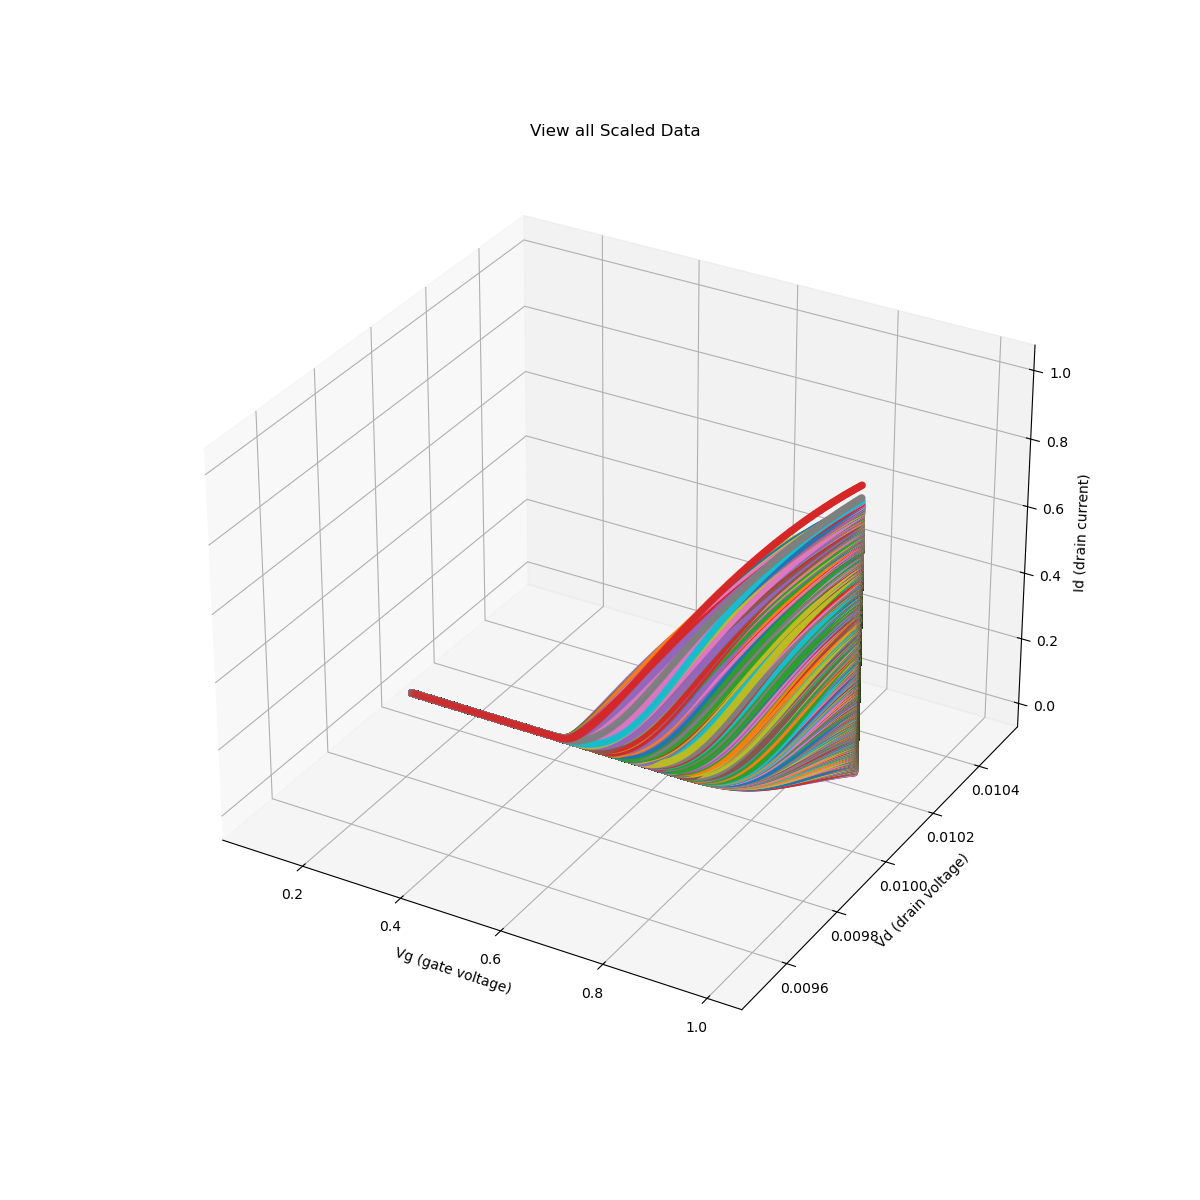

In [37]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i, row in scaled_x.iterrows():
    Vg, Vd, Id = row
    ax.scatter(Vg, Vd, Id, label=f"u0={i}")
_ = ax.set_xlabel('Vg (gate voltage)')
_ = ax.set_ylabel('Vd (drain voltage)')
_ = ax.set_zlabel('Id (drain current)')
_ = ax.set_title('View all Scaled Data')
plt.show()

In [38]:
plt.savefig('plots/hundredThousandSamplesScaled.png')
plt.close()

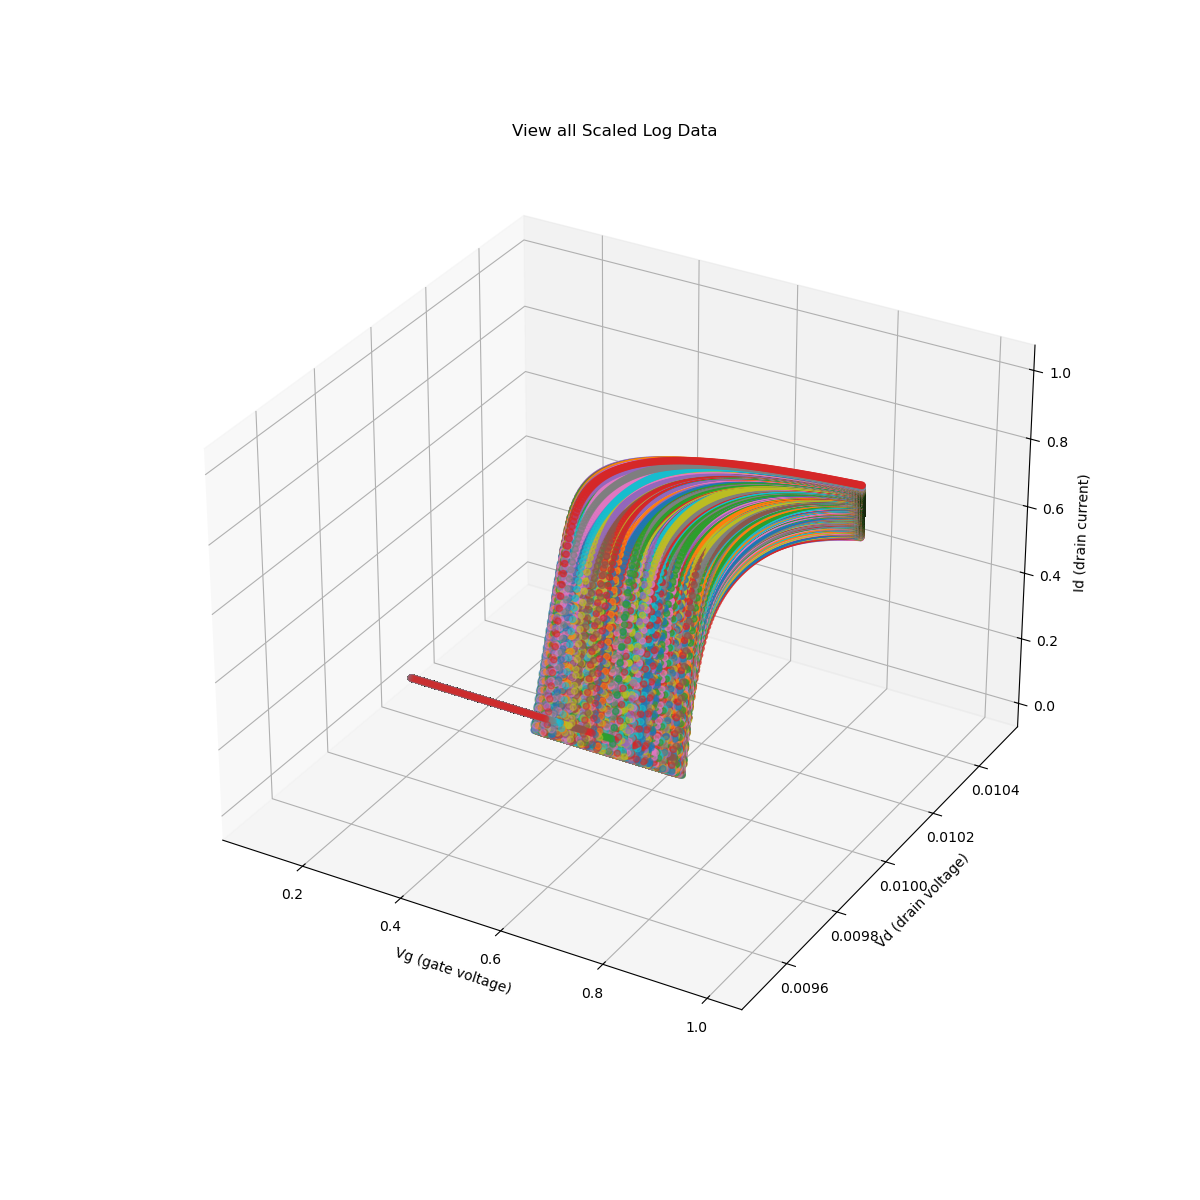

In [39]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i, row in scaled_x_log.iterrows():
    Vg, Vd, Id = row
    ax.scatter(Vg, Vd, Id, label=f"u0={i}")
_ = ax.set_xlabel('Vg (gate voltage)')
_ = ax.set_ylabel('Vd (drain voltage)')
_ = ax.set_zlabel('Id (drain current)')
_ = ax.set_title('View all Scaled Log Data')
plt.show()

In [40]:
plt.savefig('plots/hundredThousandSamplesScaledLog.png')
plt.close()

### Split

In [41]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
print('Tensorflow ver.', tf.__version__)

2024-10-13 03:32:58.713274: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 03:32:58.713439: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 03:32:58.713450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 03:32:58.720405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow ver. 2.14.0


Dataset split is 80%-20% training-validation and test sets. We use a constant state (seed) for reproducible splits across multiple runs.

In [42]:
# This should split the same way for linear and log scale because eof the random_state variable

X_iv_train_val, X_iv_test, y_iv_train_val, y_iv_test = train_test_split(X_iv, y_iv, test_size=0.2, random_state=42, shuffle=True)
X_iv_train_val_augmented, X_iv_test_augmented, y_iv_train_val_augmented, y_iv_test_augmented = train_test_split(scaled_x, y_iv, test_size=0.2, random_state=42, shuffle=True)

X_iv_train_val_log, X_iv_test_log, y_iv_train_val, y_iv_test = train_test_split(X_iv_log, y_iv, test_size=0.2, random_state=42, shuffle=True)
X_iv_train_val_augmented_log, X_iv_test_augmented_log, y_iv_train_val_augmented, y_iv_test_augmented = train_test_split(scaled_x_log, y_iv, test_size=0.2, random_state=42, shuffle=True)

In [43]:
total = y_iv_train_val.shape[0] + y_iv_test.shape[0]
print('---------------------------------------')
print('Train-and-validation set shape: {}, {:.2f}%'.format(y_iv_train_val.shape, (y_iv_train_val.shape[0]*100.)/total))
print('Test set shape:                 {}, {:.2f}%'.format(y_iv_test.shape, (y_iv_test.shape[0]*100.)/total))
print('---------------------------------------')

---------------------------------------
Train-and-validation set shape: (160000, 10), 80.00%
Test set shape:                 (40000, 10), 20.00%
---------------------------------------


In [44]:
total = y_iv_train_val_augmented.shape[0] + y_iv_test_augmented.shape[0]
print('---------------------------------------')
print('Train-and-validation set shape: {}, {:.2f}%'.format(y_iv_train_val_augmented.shape, (y_iv_train_val_augmented.shape[0]*100.)/total))
print('Test set shape:                 {}, {:.2f}%'.format(y_iv_test_augmented.shape, (y_iv_test_augmented.shape[0]*100.)/total))
print('---------------------------------------')

---------------------------------------
Train-and-validation set shape: (160000, 10), 80.00%
Test set shape:                 (40000, 10), 20.00%
---------------------------------------


### Save

Save the split data set for future reference

In [45]:
!rm -f $DATA_DIR/npy/*npy

In [46]:
np.save('{}/npy/x_iv_train_val.npy'.format(DATA_DIR), X_iv_train_val)
np.save('{}/npy/x_iv_test.npy'.format(DATA_DIR), X_iv_test)
np.save('{}/npy/x_iv_train_val_log.npy'.format(DATA_DIR), X_iv_train_val_log)
np.save('{}/npy/x_iv_test_log.npy'.format(DATA_DIR), X_iv_test_log)
np.save('{}/npy/y_iv_train_val.npy'.format(DATA_DIR), y_iv_train_val)
np.save('{}/npy/y_iv_test.npy'.format(DATA_DIR), y_iv_test)

print('Data saved in: {}/npy'.format(DATA_DIR))

Data saved in: data/npy


In [47]:
np.save('{}/npy/x_iv_train_val_augmented.npy'.format(DATA_DIR), X_iv_train_val_augmented)
np.save('{}/npy/x_iv_test_augmented.npy'.format(DATA_DIR), X_iv_test_augmented)
np.save('{}/npy/x_iv_train_val_augmented_log.npy'.format(DATA_DIR), X_iv_train_val_augmented_log)
np.save('{}/npy/x_iv_test_augmented_log.npy'.format(DATA_DIR), X_iv_test_augmented_log)
np.save('{}/npy/y_iv_train_val_augmented.npy'.format(DATA_DIR), y_iv_train_val_augmented)
np.save('{}/npy/y_iv_test_augmented.npy'.format(DATA_DIR), y_iv_test_augmented)

print('Data saved in: {}/npy'.format(DATA_DIR))

Data saved in: data/npy


In [48]:
!ls $DATA_DIR/npy/*npy

data/npy/x_iv_test_augmented_log.npy
data/npy/x_iv_test_augmented.npy
data/npy/x_iv_test_log.npy
data/npy/x_iv_test.npy
data/npy/x_iv_train_val_augmented_log.npy
data/npy/x_iv_train_val_augmented.npy
data/npy/x_iv_train_val_log.npy
data/npy/x_iv_train_val.npy
data/npy/y_iv_test_augmented.npy
data/npy/y_iv_test.npy
data/npy/y_iv_train_val_augmented.npy
data/npy/y_iv_train_val.npy


### Visualize

Modify to visualize scaled or unscaled values as needed. Takes a long time so you can also sample data for efficiency

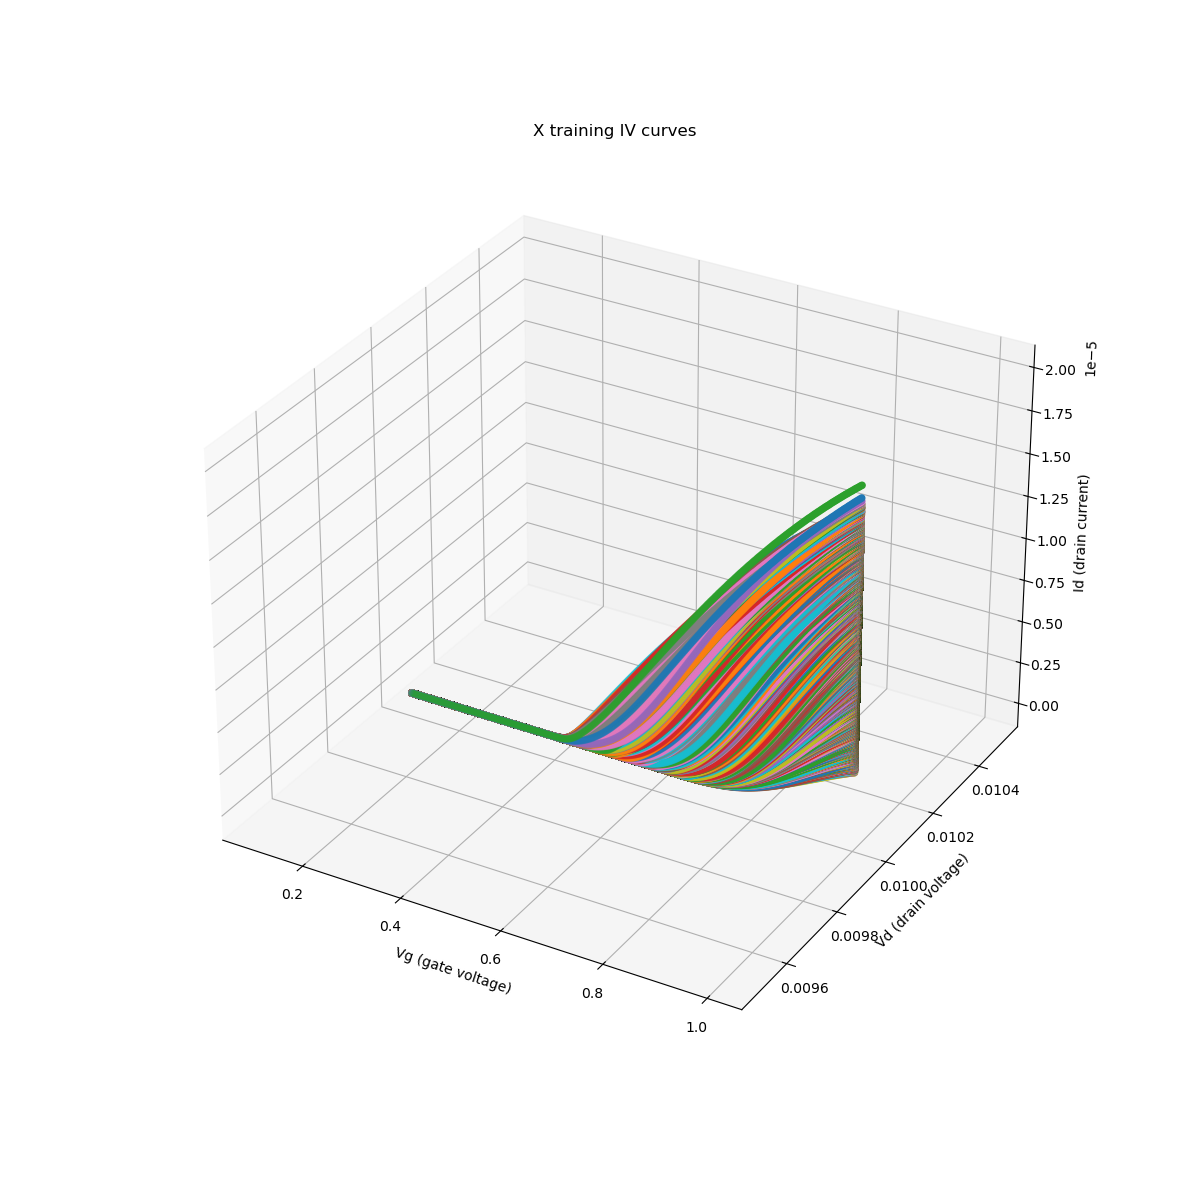

In [49]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i, row in X_iv_train_val.iterrows():
    Vg, Vd, Id = row
    ax.scatter(Vg, Vd, Id, label=f"u0={i}")
_ = ax.set_xlabel('Vg (gate voltage)')
_ = ax.set_ylabel('Vd (drain voltage)')
_ = ax.set_zlabel('Id (drain current)')
_ = ax.set_title('X training IV curves')
plt.show()

In [50]:
plt.savefig('plots/xTrainingDataUnscaled.png')
plt.close()

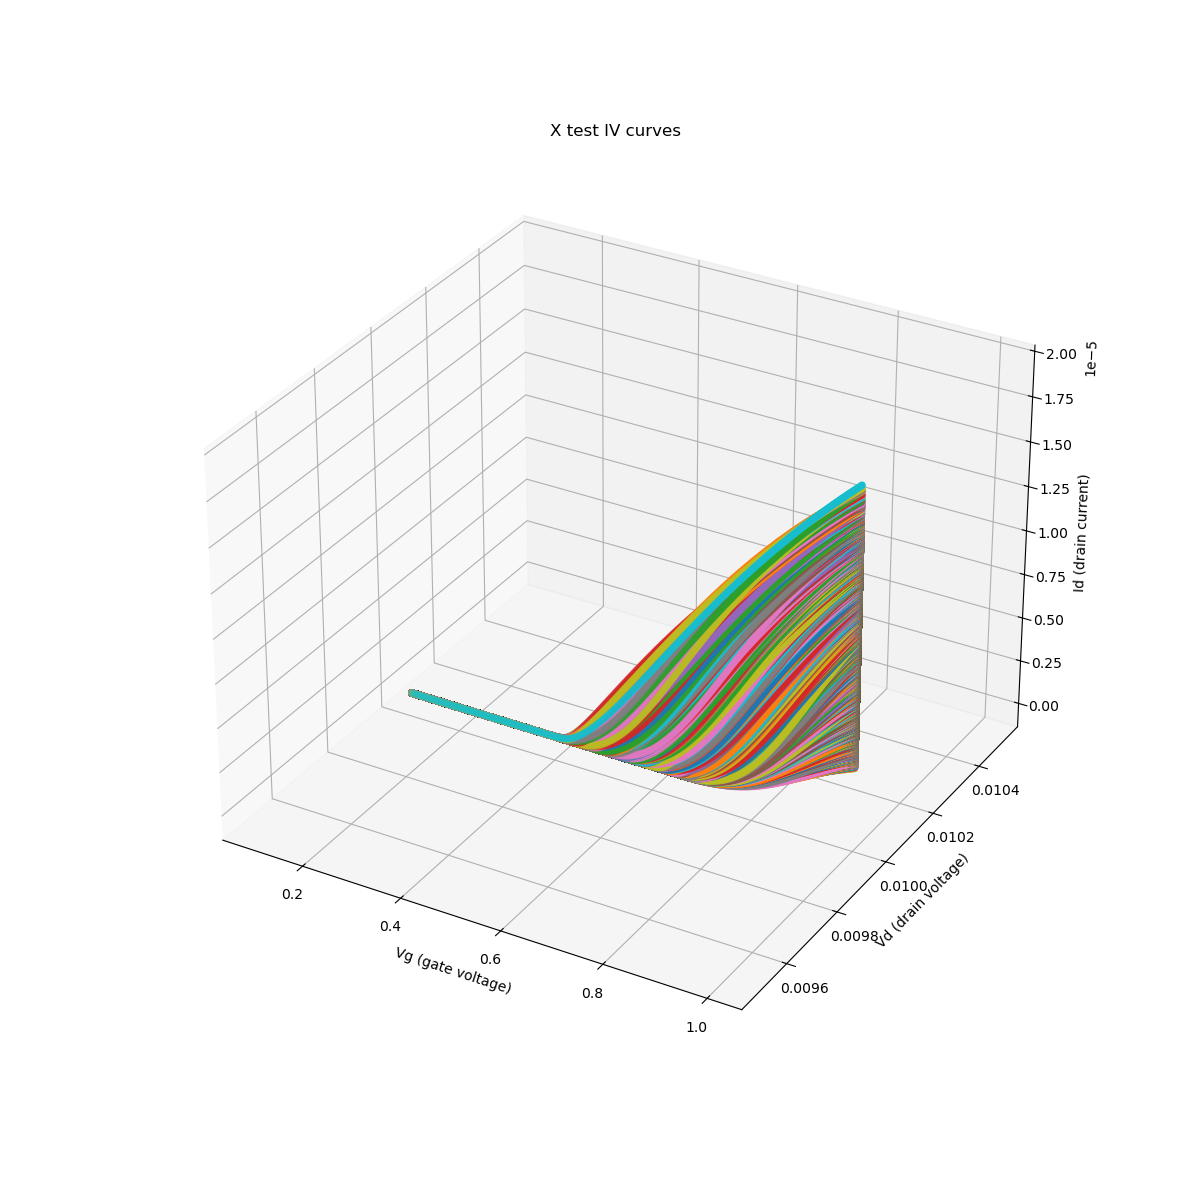

In [51]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i, row in X_iv_test.iterrows():
    Vg, Vd, Id = row
    ax.scatter(Vg, Vd, Id, label=f"u0={i}")
_ = ax.set_xlabel('Vg (gate voltage)')
_ = ax.set_ylabel('Vd (drain voltage)')
_ = ax.set_zlabel('Id (drain current)')
_ = ax.set_title('X test IV curves')
plt.show()

In [52]:
plt.savefig('plots/xTestDataUnscaled.png')
plt.close()